## 인공지능 과제 1
---
이름: 김태산

학과: 자동차공학과

학번: 20143211

---
### - 아래 링크의 pytorch tutorial을 직접 타이핑하여 수행한 후 과제를 진행하시기 바랍니다.
https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

### PYTORCH가 무엇인가요?
- Pytorch는 페이스북의 인공지능 연구팀이 만들고 유지보수하는 파이썬 기반의 오픈소스 딥러닝 프레임워크이다.
- Pytorch를 사용하면 GPU를 활용하여 쉽게 인공신경망 모델을 생성하고 학습시킬 수 있다.
- 또한 Pytorch의 핵심 데이터 타입인 텐서(Tensor)는 파이썬의 Numpy와 비슷하여 Numpy를 대체할 수 있고, GPU를 통한 연산에도 사용될 수 있다는 장점이 있다.

#### Tensors
- 텐서(Tensor)는 Numpy의 ndarray와 유사하며, GPU를 사용한 연산 가속이 가능하다.

In [34]:
from __future__ import print_function
import torch

- torch.empty() 함수를 사용하여 초기화되지 않은 텐서 행렬을 생성한다.
  
  - 초기화되지 않은 행렬을 생성하면 그 시점에 할당된 메모리에 존재하는 값을 초기값으로 입력한다.

In [35]:
x = torch.empty(5, 3)
print(x)

tensor([[-5.2340e-38,  0.0000e+00,  2.8026e-44],
        [ 0.0000e+00,  1.4013e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


- torch.rand() 함수를 사용하여 무작위로 초기화된 텐서 행렬을 생성한다.

In [36]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2119, 0.2955, 0.4114],
        [0.0441, 0.5963, 0.0481],
        [0.0162, 0.9787, 0.9251],
        [0.3337, 0.6326, 0.7215],
        [0.7638, 0.6921, 0.1380]])


- torch.zeros() 함수를 사용하여 0으로 채워진 텐서 행렬을 생성한다.
- 이 때 dtype=torch.long으로 지정하면, 각 요소의 데이터형을 long(int64)으로 지정한다.

In [37]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


- 원하는 데이터를 입력하여 텐서를 직접 생성할 수도 있다.

In [38]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


- 기존에 존재하는 텐서의 속성을 사용하여 새로운 텐서를 생성할 수 있다.

  - x.new_ones() 함수는 사용자가 dtype을 따로 지정하지 않는 한, 기존에 존재하는 텐서 x와 동일한 dtype을 가지는 1로 채워진 텐서를 생성한다.
  - torch.randn_like() 함수는 사용자가 dtype을 따로 지정하지 않는 한, 기존에 존재하는 텐서 x와 동일한 크기와 dtype을 가지고 가우시안 정규분포를 따르는 텐서를 생성한다.

In [39]:
x = x.new_ones(5, 3, dtype=torch.double) # new_ones()나 new_zeros()와 같은 new_* 메서드는 텐서의 크기를 입력 받는다.
print(x)
x = torch.randn_like(x, dtype=torch.float) # dtype을 따로 지정하여 오버라이드(override) 한다.
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.1972, -0.0113,  2.1402],
        [ 0.7314,  0.3439, -0.9812],
        [-0.8354, -1.1397, -1.6156],
        [ 1.4396, -0.5325,  1.3269],
        [-0.0841, -0.0617,  1.7100]])


- x.size() 메서드는 텐서의 크기를 리턴해준다.
- torch.Size는 튜플 타입으로 되어 있어 튜플 연산이 가능하다.

In [40]:
print(x.size())

torch.Size([5, 3])


### 연산(Operations)
- Pytorch는 연산을 위한 여러가지의 문법을 제공한다.
---
#### 덧셈 연산
  
  - 기존의 덧셈 방식과 같이 두 텐서를 합할 수 있다.

In [41]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.3464,  0.0395,  2.6696],
        [ 0.8976,  1.1050, -0.1115],
        [-0.2536, -0.1992, -1.5904],
        [ 1.6617, -0.2144,  2.1339],
        [ 0.2088,  0.4340,  1.9025]])



   - torch.add() 함수를 사용하여 덧셈을 수행할 수도 있다.

In [42]:
print(torch.add(x, y))

tensor([[ 0.3464,  0.0395,  2.6696],
        [ 0.8976,  1.1050, -0.1115],
        [-0.2536, -0.1992, -1.5904],
        [ 1.6617, -0.2144,  2.1339],
        [ 0.2088,  0.4340,  1.9025]])


* 덧셈 수행의 결과를 out 키워드를 통해 새로운 텐서로 입력할 수 있다.

In [43]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.3464,  0.0395,  2.6696],
        [ 0.8976,  1.1050, -0.1115],
        [-0.2536, -0.1992, -1.5904],
        [ 1.6617, -0.2144,  2.1339],
        [ 0.2088,  0.4340,  1.9025]])


- in-place 방식으로 y에 x를 더한 결과를 y에 업데이트할 수 있다.
  - 이 방법을 사용할 때에는 함수 뒤에 '_'를 붙여주어야 한다.
 
    ex) x.copy_(y), x.t_()

In [44]:
print(y)
y.add_(x)
print(y)

tensor([[0.5435, 0.0509, 0.5294],
        [0.1663, 0.7610, 0.8697],
        [0.5818, 0.9405, 0.0252],
        [0.2221, 0.3181, 0.8070],
        [0.2930, 0.4958, 0.1925]])
tensor([[ 0.3464,  0.0395,  2.6696],
        [ 0.8976,  1.1050, -0.1115],
        [-0.2536, -0.1992, -1.5904],
        [ 1.6617, -0.2144,  2.1339],
        [ 0.2088,  0.4340,  1.9025]])


Numpy에서와 같은 방법으로 텐서를 인덱싱할 수 있다.

In [45]:
print(x[:, 1])

tensor([-0.0113,  0.3439, -1.1397, -0.5325, -0.0617])


텐서의 크기(size)나 모양(shape)을 변경할 때에는 torch.view() 메서드를 사용한다.

In [46]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1을 입력하면, 다른 입력값에 맞게 크기를 맞춘다.
                  # 예시에서 8을 입력하면 텐서 행렬의 크기를 8열로 먼저 맞춘 후 필요한 행의 크기(2)를 지정한다.
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


텐서의 요소가 한 개이면, x.item() 메서드를 사용하여 스칼라 값을 리턴할 수 있다.

In [47]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.2688])
-0.2687608599662781


### Numpy 변환(Bridge)
- Torch 텐서와 Numpy 배열(array)을 서로 쉽게 변환할 수 있다.
- Torch 텐서가 CPU 상에 있을 경우, Torch 텐서와 Numpy 배열은 메모리 공간을 공유하기 때문에, 한 쪽을 변경하면 다른 한 쪽도 같이 변경된다.

#### Torch 텐서를 Numpy 배열로 변환

In [48]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


- b는 Torch 텐서 a를 Numpy 배열로 변환한 Numpy 배열이다.

In [49]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


- Torch 텐서와 Numpy 배열은 메모리 공간을 공유하므로 Torch 텐서 a를 변경하면 다음과 같이 Numpy 배열 b도 변경된다.

In [50]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Numpy 배열을 Torch 텐서로 변환
  - Torch 텐서와 Numpy 배열은 메모리 공간을 공유하므로 Numpy 배열 a를 변경하면 다음과 같이 Torch 텐서 b도 변경된다.

In [51]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # out 키워드를 통해 덧셈 연산의 결과로 a를 업데이트
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


* CharTensor를 제외한 모든 텐서는 Numpy와 서로 변환이 가능하다.

### CUDA Tensors
- CUDA는 엔비디아(NVIDIA)가 GPU를 통한 연산을 가능하게 만든 API 모델이다.
- 딥러닝에서 많이 사용하는 병렬 연산을 수행할 때 GPU의 처리 속도는 CPU의 처리 속도보다 월등히 빠르며 이 차이는 지속적으로 벌어지고 있으므로 CUDA를 통한 GPU 연산은 필수적이다.
- 코랩에서 GPU를 이용하여 연산하기 위해서는 런타임 탭의 런타임 유형 변경에서 하드웨어 가속기를 GPU로 변경하면 된다.
- 텐서는 .to() 메서드를 통해 어떤 device로도 이동시킬 수 있다.
- 이를 통해 텐서를 cuda device로 이동시키면 GPU를 통한 병렬 연산을 수행할 수 있다.

In [52]:
import torch
if torch.cuda.is_available():
  device = torch.device("cuda")
  y = torch.ones_like(x, device=device)
  x = x.to(device)
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))

tensor([0.7312], device='cuda:0')
tensor([0.7312], dtype=torch.float64)


### AUTOGRAD: 자동 미분
- Pytorch의 autograd 패키지에는 자동 미분을 위한 함수가 포함되어 있어, 텐서의 모든 연산에 대해 자동 미분을 제공한다. 
- 자동 미분의 on, off를 제어하는 enable_grad, no_grad나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 Function 등이 포함되어 있다.
- 텐서를 생성할 때 requires_grad=True로 설정하면 생성한 텐서를 이용한 모든 연산들을 추적하고, 연산을 완료한 후 backward()를 호출하면 모든 그레디언트(gradient)를 자동으로 계산해준다.
- 이 때 텐서의 그레디언트는 grad 속성에 누적된다.
- detach()를 호출하면 텐서를 연산 기록으로부터 분리하여 텐서의 연산을 추적하는 것을 중단시킬 수 있다.
- 또 코드를 with torch.no_grad(): 로 감싸게 되면, 기록을 추적하지 않게 되고 메모리도 차지하지 않게 할 수 있는데, 이는 require_grad=True로 설정하지만 그레디언트를 누적하지 않기 때문에 매개변수를 가지는 모델을 평가(evaluate)할 때 유용하게 사용된다.
- autograd 패키지의 또다른 중요한 클래스인 Function 클래스는 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스이다.
- 텐서와 Function은 상호 연결(interconnect)되어 있으므로, Function 클래스는 텐서 연산이 수행되는 과정을 추적하고 이를 부호화하여 비순환(acyclic) 그래프로 만든다.
- 텐서가 가지고 있는 .grad_fn 이러한 Function 클래스를 참조하는 속성으로, 호출 시 연산 과정을 불러올 수 있다.
- 텐서의 미분값을 계산할 때에는 텐서의 .backward() 속성을 호출하면 된다.
- 이 때 텐서가 스칼라 이상의 형태(벡터나 행렬)일 경우에는 그레디언트의 인자(argument)로 텐서의 모양(shape)을 입력해주어야 한다.

In [53]:
import torch

- 텐서를 생성할 때 requires_grad=True로 지정하면 텐서가 연산되는 과정을 추적한다.

In [54]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


텐서 연산 수행

In [55]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- y는 x를 연산한 결과값이므로 연산에 대한 정보를 담고 있는 grad_fn 속성을 가지게 된다.
- 출력값을 보면, y는 x의 덧셈 연산을 수행한 결과이므로 y.grad_fn이 AddBackward0 객체임을 알 수 있다.

In [56]:
print(y.grad_fn)

- y에 대해 다른 연산들을 수행한 결과인 z와 out 또한 grad_fn 속성을 가지게 되고 각각 MulBackward0, MeanBackward0 객체를 가진다.

In [57]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


- .requires_grad_() 메서드를 사용하면 텐서의 requires_grad flag를 바꿀 수 있다.
- default값은 False이고 이는 텐서의 requires_grad가 True일 때 False로 변경한다는 것을 의미한다.
- 출력을 보면 텐서 a를 생성할 때 requires_grad를 지정하지 않았으므로 requires_grad=False이고, 이를 a.requires_grad_(True)를 통해 True로 변경되었다.

In [58]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


#### 변화도(Gradients)
- 위에서 requires_grad를 지정하는 것과 연산 과정을 추적하는 것에 대해 알아보았고, 다음으로 역전파(backprop)에 대해서 알아본다.
- 연산 과정의 미분값을 계산할 때에는 backward() 메서드를 사용한다. 
- 위에서 생성한 변수 out은 하나의 스칼라값을 가지므로, out.backward()는 out.backward(torch.tensor(1.))과 동일한 연산이다.

In [59]:
out.backward()

- x.grad를 통해 out에 대한 그레디언트 d(out)/dx를 출력한다.
- 연산 과정을 생각해보면, y = x + 2, z = 3 * (y ** 2)이므로 z = 3 * (x + 2) ** 2이고, out은 z의 요소값들을 평균한 연산이다.
- 따라서 d(out)/dx를 계산하는 것은 z를 x에 대해서 미분한 값을 평균하는 것과 동일하다.
- z를 x에 대해 미분하면 dz/dx = 6 * (x + 2)이고 x의 모든 요소값이 1이므로 x = 1일 때 dz/dx 값은 18이고 이를 평균하기 위해 x 요소 갯수인 4로 나누면 x = 1일 때의 d(out)/dx는 4.5가 된다.
- 따라서 x의 요소값이 모두 1이기 때문에 x의 그레디언트가 모두 4.5가 되는 것을 알 수 있다.

In [60]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


- 수학적으로 y = f(x)이고 x와 y가 벡터이면 f는 행렬이 되어야 하고, 이 때 x에 대한 y의 그레디언트를 계산하면 아래와 같이 x에 대한 y의 1차 도함수 dy/dx 형태인 야코비안 행렬(Jacobian matrix) J가 된다.

  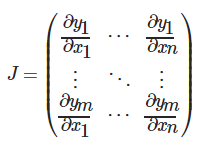

- torch.autograd는 이러한 야코비안 행렬과 벡터에 대한 곱셈 연산을 수행해주는 패키지이다.
- 이 때 y에 대한 l의 함수를 l = g(y)이라고 하면 l = g(f(x))이고, l을 x에 대해 미분하면 연쇄법칙에 의해 dl/dx = dy/dx * dl/dy이다.
- 여기서 dy/dx가 자코비안 행렬 J가 되고, dl/dy는 벡터 형태이므로, 야코비안 행렬과 벡터 곱을 통해 x에 대한 l의 미분을 연쇄법칙을 통해 쉽게 구할 수 있음을 의미한다.

  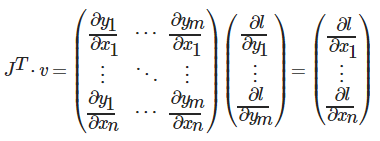
- 자코비안 행렬과 벡터의 곱의 이러한 특성은 스칼라가 아닌 값을 출력하는 모델에 그레디언트를 전달할 때 매우 유용하고, 이러한 연산과정을 torch.autograd가 제공하게 된다.

In [61]:
x = torch.randn(3, requires_grad=True)

y = x * 2
i = 0
while y.data.norm() < 1000: # requires_grad=True일 때 .data를 통해서 텐서의 데이터에 접근할 수 있다.
                            # norm()은 L2 norm(Euclidean norm)을 계산해준다.
  y = y * 2
  i += 1

print(y)
print(i)

tensor([-798.1437, -410.2188, -685.1188], grad_fn=<MulBackward0>)
8


- 위에서 y는 스칼라가 아닌 벡터이고, 연산 과정을 보면 y = (2 ** 9) * x임을 알 수 있다.
- torch.autograd는 야코비안 행렬을 통해 직접 미분값을 계산할 수는 없지만, 벡터 v(tensor([1.0000e-01, 1.0000e+00, 1.0000e-04]))와 같이 backward()에 벡터를 입력해주면 야코비안 행렬과 벡터의 곱으로 벡터 v일 때 x에 대한 그레디언트를 구할 수 있다.
- 결과를 보면, x에 대한 y의 기울기가 2 ** 9 = 512이고 여기에 벡터 v를 입력하여 v일 때 x의 그레디언트가 출력되는 것을 알 수 있다.

In [62]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- with과 함께 아래와 같이 with torch.no_grad(): 를 사용하여 코드를 감싸면 with 문 내에서 requires_grad=False가 되어 requires_grad=True인 텐서의 연산과정이 추적되지 않도록 한다.
- 이러한 코드는 기계학습에서 모델을 최적화하는 과정에서 모델의 매개변수를 갱신할 때 사용하면 유용하다.

In [63]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- detach()를 사용하면, 아래와 같이 requires_grad만 False로 설정된 텐서를 얻을 수 있다.
- 출력 결과를 보면, y의 모든 요소가 x와 동일하다는 것을 알 수 있다.

In [64]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) # torch.eq()는 element-wise로 두 텐서가 가지는 요소의 동일 여부를 boolean 텐서로 리턴해준다.
                     # torch.all()은 텐서의 모든 요소가 True일 경우 True를, 그렇지 않을 경우 False를 텐서로 리턴해준다.

True
False
tensor(True)


### 1. 아래는 tutorial에서 설명한 메소드들입니다. 괄호 안에 해당 매소드를 적으세요.
(예시) (`torch.empty()`) : Returns a tensor filled with uninitialized data.

1) (`torch.rand()`) : Returns a tensor filled with random numbers from a
uniform distribution on the interval [0, 1)

In [65]:
torch.rand(5, 4)

tensor([[0.3259, 0.7804, 0.0457, 0.4572],
        [0.7242, 0.8629, 0.2588, 0.0577],
        [0.7877, 0.9308, 0.9626, 0.2002],
        [0.2728, 0.2300, 0.2044, 0.1721],
        [0.5408, 0.2933, 0.6350, 0.2172]])

2) (`torch.zeros()`) : Returns a tensor filled with the scalar value 0, with
the shape defined by the variable argument size.

In [72]:
torch.zeros(5, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

3) (`torch.tensor()`) : Constructs a tensor with data.

In [73]:
a = torch.tensor([[1.0, 2.0, 3.0], [5.0, 6.0, 7.0]])
a

tensor([[1., 2., 3.],
        [5., 6., 7.]])

In [74]:
b = torch.randn_like(a, dtype=torch.float)
b

tensor([[ 0.0686,  0.7693,  0.9944],
        [-0.9386,  0.3061, -0.5222]])

In [76]:
print(a + b)
print(torch.add(a, b)) # torch 내장 함수 사용
a.add_(b) # 텐서 함수 사용

tensor([[1.1372, 3.5385, 4.9888],
        [3.1229, 6.6122, 5.9556]])
tensor([[1.1372, 3.5385, 4.9888],
        [3.1229, 6.6122, 5.9556]])


tensor([[1.1372, 3.5385, 4.9888],
        [3.1229, 6.6122, 5.9556]])

4) (`torch.from_numpy()`) : Creates a Tensor from a numpy.ndarray.

In [77]:
ex_np = np.random.rand(5, 4)
ex_tuple = tuple(ex_np)

In [78]:
ex1 = torch.from_numpy(ex_np)
ex1

tensor([[0.6012, 0.7735, 0.9557, 0.5051],
        [0.8230, 0.9182, 0.3506, 0.9829],
        [0.8237, 0.6656, 0.8077, 0.3353],
        [0.1214, 0.4670, 0.9214, 0.3423],
        [0.7116, 0.8802, 0.1819, 0.6108]], dtype=torch.float64)

5) (`torch.as_tensor()`) : Convert the data into a torch.Tensor.

In [79]:
ex2 = torch.as_tensor(ex_tuple)
ex2

tensor([[0.6012, 0.7735, 0.9557, 0.5051],
        [0.8230, 0.9182, 0.3506, 0.9829],
        [0.8237, 0.6656, 0.8077, 0.3353],
        [0.1214, 0.4670, 0.9214, 0.3423],
        [0.7116, 0.8802, 0.1819, 0.6108]], dtype=torch.float64)

6) (`torch.cat()`) : Concatenates the given sequence of seq tensors in
the given dimension.

In [81]:
cat_result = torch.cat([ex1, ex2])
print(cat_result)
print(cat_result.size())  # 데이터 타입이 동일해야 함. 디폴트는 세로로 텐서를 합쳐준다.
print(ex1.size())

tensor([[0.6012, 0.7735, 0.9557, 0.5051],
        [0.8230, 0.9182, 0.3506, 0.9829],
        [0.8237, 0.6656, 0.8077, 0.3353],
        [0.1214, 0.4670, 0.9214, 0.3423],
        [0.7116, 0.8802, 0.1819, 0.6108],
        [0.6012, 0.7735, 0.9557, 0.5051],
        [0.8230, 0.9182, 0.3506, 0.9829],
        [0.8237, 0.6656, 0.8077, 0.3353],
        [0.1214, 0.4670, 0.9214, 0.3423],
        [0.7116, 0.8802, 0.1819, 0.6108]], dtype=torch.float64)
torch.Size([10, 4])
torch.Size([5, 4])


7) (`torch.stack()`) : Concatenates sequence of tensors along a new
dimension.

In [82]:
stack_result = torch.stack([ex1, ex2])
print(stack_result)
print(stack_result.size())   # 합쳐지는게 아니라 새로운 차원으로 붙는 것

tensor([[[0.6012, 0.7735, 0.9557, 0.5051],
         [0.8230, 0.9182, 0.3506, 0.9829],
         [0.8237, 0.6656, 0.8077, 0.3353],
         [0.1214, 0.4670, 0.9214, 0.3423],
         [0.7116, 0.8802, 0.1819, 0.6108]],

        [[0.6012, 0.7735, 0.9557, 0.5051],
         [0.8230, 0.9182, 0.3506, 0.9829],
         [0.8237, 0.6656, 0.8077, 0.3353],
         [0.1214, 0.4670, 0.9214, 0.3423],
         [0.7116, 0.8802, 0.1819, 0.6108]]], dtype=torch.float64)
torch.Size([2, 5, 4])


8) (`torch.eye()`) : Returns a 2-D tensor with ones on the diagonal and
zeros elsewhere.

In [83]:
torch.eye(3) # 원-핫 인코딩 시 유용하게 사용됨
             # 0-9까지 한개의 1값으로 해당 데이터의 라벨값을 구분할 수 있는 기법임.

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

**AUTOGRAD 패키지**
- autograd 패키지는 텐서로 수행한 모든 연산에 대해서 자동미분 기능을 제공하며 실행 시점에서 정의되는(define-by-run) 프레임 워크이다. 이는 코드가 어떻게 실행되는가에 따라 역전파가 정의됨을 의미한다. 즉, 반복마다 역전파가 달라질 수 있음을 의미한다.
- 모든 계산을 마친 후에 backward()를 호출하면 자동으로 모든 기울기를 계산한다.

9) A tensor can be created with (`requires_grad=True`) so
that torch.autograd records operations on them for automatic
differentiation.

In [114]:
x = torch.ones(5, 4, requires_grad=True) # True이면 모든 연산을 추적한다.
y = torch.sum((x + 2) ** 2) # y는 x에 대한 연산을 수행한 것.
print(x)
print(y) # y는 x의 연산 결과로 만들어진 텐서이므로 grad_fn을 가지고 있음.

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)
tensor(180., grad_fn=<SumBackward0>)


In [125]:
# y는 연산의 결과로 생성된 것이기 때문에 grad_fn을 가짐
# grad_fn 속성을 출력하여 미분함수를 확인할 수 있음
print(y.grad_fn)

In [124]:
print(x.grad) # 역전파 아직 안했으므로 x의 미분값은 None임

tensor([[18., 18., 18., 18.],
        [18., 18., 18., 18.],
        [18., 18., 18., 18.],
        [18., 18., 18., 18.],
        [18., 18., 18., 18.]])


In [129]:
# y의 역전파.
# y는 하나의 스칼라 값을 가지므로 backward 인자를 지정하지 않은 것.
# y가 벡터이면 인자를 지정해주어야 한다.
# retain_graph: 미분 연산을 위한 임시 그래프를 유지할 것인가를 지정하는 인자. 
# 동일한 연산에 대해 여러번 미분을 계산하기 위해 True로 지정
# 그레디언트를 계산하기 위한 그래프가 backward를 진행할 때마다 바로바로 지워짐
# 그렇게 되면 그레디언트를 직접 눈으로 확인할 수 없음
# backward를 진행한 직후의 그레디언트를 보기 위해 True로 지정
y.backward(retain_graph=True)

In [127]:
x.grad
# 첫 번째 backward()를 호출한 뒤의 x.grad의 값과 두 번째 backward()를 호출한 
# 뒤의 x.grad의 값을 비교해 보면 값이 다름
# 이것은 backward()에서 Gradient를 x.grad에 저장할 때 Gradient를
# 덮어쓰는 것이 아니라 기존 저장되어 있는 x.grad값에 Gradient를 더하기 때문임.

tensor([[24., 24., 24., 24.],
        [24., 24., 24., 24.],
        [24., 24., 24., 24.],
        [24., 24., 24., 24.],
        [24., 24., 24., 24.]])

10) (`torch.autograd.backward()`) : Computes the sum of gradients of given tensors w.r.t. graph leaves.

The graph is differentiated using the chain rule. If any of tensors are nonscalar(i.e. their data has more than one element) and require gradient,
then the Jacobian-vector product would be computed, in this case the
function additionally requires specifying grad_tensors. It should be a
sequence of matching length, that contains the “vector” in the Jacobianvector
product, usually the gradient of the differentiated function w.r.t.corresponding tensors (None is an acceptable value for all tensors that
don’t need gradient tensors).

This function accumulates gradients in the leaves - you might need to
zero .grad attributes or set them to None before calling it. See Default
gradient layouts for details on the memory layout of accumulated gradients.

In [131]:
torch.autograd.backward(y, retain_graph=True) # y.backward()와 동일.

11) (`torch.autograd.grad()`) : Computes and returns the sum of gradients of outputs w.r.t. the inputs.

grad_outputs should be a sequence of length matching output containing
the “vector” in Jacobian-vector product, usually the pre-computed gradients
w.r.t. each of the outputs. If an output doesn’t require_grad, then the
gradient can be None).

If only_inputs is True, the function will only return a list of gradients w.r.t the specified inputs. If it’s False, then gradient w.r.t. all remaining leaves will still be computed, and will be accumulated into their .grad attribute.

In [132]:
torch.autograd.grad(y, x) # 리턴 값이 tuple 형태

(tensor([[6., 6., 6., 6.],
         [6., 6., 6., 6.],
         [6., 6., 6., 6.],
         [6., 6., 6., 6.],
         [6., 6., 6., 6.]]),)

12) (`torch.norm()`) : Returns the matrix norm or vector norm of a given
tensor.

In [84]:
torch.norm(ex1) # 텐서의 크기를 측정.

tensor(3.0838, dtype=torch.float64)

13) (`torch.no_grad()`) : Context-manager that disabled gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure that
you will not call Tensor.backward(). It will reduce memory consumption for
computations that would otherwise have requires_grad=True. In this mode, the result of every computation will have requires_grad=False,
even when the inputs have requires_grad=True. 

This mode has no effect when using enable_grad context manager. This context manager is thread local; it will not affect computation in other
threads. Also functions as a decorator. (Make sure to instantiate with parenthesis.)

In [133]:
with torch.no_grad():
  x = torch.rand(3, requires_grad=True)
  print(x.requires_grad)
  y = x + 2 # 어떤 연산의 결과가 나올 때 False로 지정함.
  print(y.requires_grad)
print('-' * 20)
y = x + 2
print(y.requires_grad)

True
False
--------------------
True


14) (`torch.Tensor.detach()`) : Returns a new Tensor, detached from the current graph. The result will never require gradient.

In [134]:
print(x.requires_grad)
z = x.detach()
print(z.requires_grad)

True
False


In [ ]:
print(z.backward()) # 오류 발생

- ex) 텐서가 스칼라 값이 아닌 경우의 예시

In [139]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2
print(y) # y가 벡터의 형태임. 이 때는 역전파할 때 그레디언트 인자를 지정해주어야 함.

tensor([-183.2086, -856.7793,  601.4562], grad_fn=<MulBackward0>)


In [140]:
# 인자값은 미분함수의 기울기를 포함하며 데이터 타입이 동일하여야 함.
v = torch.tensor([0.1, 1, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### 2. 다음 주어진 x 값을 토대로 아래의 문제를 수행하세요(아래의 예시처럼 torch.rand(5,4)를 직접 실행하여 과제를 진행하시기 바랍니다.).

In [142]:
x = torch.rand(5, 4)
x

tensor([[0.1785, 0.0038, 0.6489, 0.5031],
        [0.4294, 0.5408, 0.4956, 0.9727],
        [0.9554, 0.9366, 0.3613, 0.1738],
        [0.8225, 0.2867, 0.2098, 0.2725],
        [0.1250, 0.6104, 0.3393, 0.8016]])

1) x의 shape을 구하세요.

In [143]:
print(x.shape)

torch.Size([5, 4])


2) x의 행렬에서 3열을 indexing을 사용해서 출력하세요.

In [144]:
print(x[:, 2])

tensor([0.6489, 0.4956, 0.3613, 0.2098, 0.3393])


3) x를 (2, 10)의 크기로 바꾸는 메소드를 사용하여 크기를 변경한 후 출력하세요.

In [145]:
x = x.view(2,10)
print(x)
print(x.view(-1, 10)) # 이렇게도 가능
print(x.reshape(2, 10)) # 이렇게도 가능

tensor([[0.1785, 0.0038, 0.6489, 0.5031, 0.4294, 0.5408, 0.4956, 0.9727, 0.9554,
         0.9366],
        [0.3613, 0.1738, 0.8225, 0.2867, 0.2098, 0.2725, 0.1250, 0.6104, 0.3393,
         0.8016]])
tensor([[0.1785, 0.0038, 0.6489, 0.5031, 0.4294, 0.5408, 0.4956, 0.9727, 0.9554,
         0.9366],
        [0.3613, 0.1738, 0.8225, 0.2867, 0.2098, 0.2725, 0.1250, 0.6104, 0.3393,
         0.8016]])
tensor([[0.1785, 0.0038, 0.6489, 0.5031, 0.4294, 0.5408, 0.4956, 0.9727, 0.9554,
         0.9366],
        [0.3613, 0.1738, 0.8225, 0.2867, 0.2098, 0.2725, 0.1250, 0.6104, 0.3393,
         0.8016]])


4) x를 cuda 장치 객체로 변경하세요.

In [146]:
x1, x2 = x, x

In [148]:
device = torch.device('cuda')
x1.to(device)

tensor([[0.1785, 0.0038, 0.6489, 0.5031, 0.4294, 0.5408, 0.4956, 0.9727, 0.9554,
         0.9366],
        [0.3613, 0.1738, 0.8225, 0.2867, 0.2098, 0.2725, 0.1250, 0.6104, 0.3393,
         0.8016]], device='cuda:0')

In [149]:
x2.cuda() # 동일한 방법

tensor([[0.1785, 0.0038, 0.6489, 0.5031, 0.4294, 0.5408, 0.4956, 0.9727, 0.9554,
         0.9366],
        [0.3613, 0.1738, 0.8225, 0.2867, 0.2098, 0.2725, 0.1250, 0.6104, 0.3393,
         0.8016]], device='cuda:0')

### 3. Pytorch tutorial에서 학습한 내용을 직접 10줄 이내로 정리하세요.

Pytorch는 대표적인 딥러닝 프레임워크 중 하나로, 2017년에 페이스북 인공지능 연구팀이 공개한 파이썬 기반 오픈소스 프레임워크이다. Pytorch의 핵심 데이터 타입인 텐서는 Numpy 배열과 비슷하고, Numpy 배열과 다르게 GPU를 사용한 연산 가속에 사용될 수 있다는 장점이 있다. 텐서는 기본적으로 torch.tensor()를 통해 생성하거나, 파이썬과 비슷하게 torch.zeros(), torch.randn() 등의 내장 함수로도 텐서를 생성할 수 있다. GPU를 통한 연산을 하기 위해서는 텐서의 device를 cuda로 지정하여 CUDA 텐서로 변경시켜주어야 한다. 또한 Pytorch의 autograd 패키지를 통해 텐서의 모든 연산에 대한 그레디언트를 자동으로 계산할 수 있다. 텐서를 requires_grad=True로 지정하면 해당 텐서의 모든 연산들을 추적한다. 그리고 그레디언트를 계산해야할 때 backward()를 호출하면 자코비안 행렬과 벡터의 곱으로 연쇄법칙을 통해 계산한다. 위와 같이 연쇄법칙을 이용하여 autograd 패키지는 텐서의 그레디언트를 출력에서부터 입력까지 역전파(backprop)하여 전달해준다. 텐서의 그레디언트는 .grad를, 연산에 대한 정보는 .grad_fn을 통해 호출한다. with torch.no_grad():를 사용하면 with 문 내에서는 연산과정을 추적하지 않아, 기계학습에서 모델의 매개변수 갱신 시 사용할 수 있다.

